In [8]:
### import 
import os
from pprint import pprint
import automater
from pymatgen.io import lobster as pmglobster
from pymatgen.electronic_structure import cohp as pmgcohp

### files
# data_dir = os.path.join(os.path.dirname(os.path.dirname(automater.__file__)), 'data', 'lobster', 'GaAs')
data_dir = os.path.join(os.path.dirname(os.path.dirname(automater.__file__)), 'data', 'lobster', 'BaTiO3')
charge_file = os.path.join(data_dir, 'CHARGE.lobster')
cohpcar_file = os.path.join(data_dir, 'COHPCAR.lobster')
coopcar_file = os.path.join(data_dir, 'COOPCAR.lobster')
doscar_file = os.path.join(data_dir, 'DOSCAR.lobster')
icohp_file = os.path.join(data_dir, 'ICOHPLIST.lobster')
icoop_file = os.path.join(data_dir, 'ICOOPLIST.lobster')
vasprun = os.path.join(data_dir, 'vasprun.xml')
posfile = os.path.join(data_dir, 'POSCAR')

In [9]:
### read files
charge = pmglobster.Charge(filename=charge_file)
cohpcar = pmglobster.Cohpcar(are_coops=False, filename=cohpcar_file)
coopcar = pmglobster.Cohpcar(are_coops=True, filename=coopcar_file)
doscar = pmglobster.Doscar(doscar=doscar_file, vasprun=vasprun)
icohp = pmglobster.Icohplist(are_coops=False, filename=icohp_file)
icoop = pmglobster.Icohplist(are_coops=True, filename=icoop_file)

In [10]:
### Charge class
## Mulliken and Loewdin charges as site properties
pprint(charge.get_structure_with_charges(structure_filename=posfile))

Structure Summary
Lattice
    abc : 3.9788692253833724 3.9788692253833724 3.9788692253833724
 angles : 60.00000000000001 60.00000000000001 60.00000000000001
 volume : 44.54141381110585
      A : 0.0 2.813485410723048 2.813485410723048
      B : 2.813485410723048 0.0 2.813485410723048
      C : 2.813485410723048 2.813485410723048 0.0
PeriodicSite: Ga (4.2202, 4.2202, 4.2202) [0.7500, 0.7500, 0.7500]
PeriodicSite: As (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]


In [11]:
### Cohp class
# cohp = pmgcohp.Cohp(cohpcar.efermi, cohpcar.energies, cohpcar.cohp_data)
cohpcar.orb_res_cohp

{'1': {'4s-4s': {'COHP': {<Spin.up: 1>: array([0., 0., 0., ..., 0., 0., 0.])},
   'ICOHP': {<Spin.up: 1>: array([0., 0., 0., ..., 0., 0., 0.])},
   'orbitals': [(4, <Orbital.s: 0>), (4, <Orbital.s: 0>)],
   'length': 2.436549838863055,
   'sites': (0, 1)},
  '4s-4py': {'COHP': {<Spin.up: 1>: array([0., 0., 0., ..., 0., 0., 0.])},
   'ICOHP': {<Spin.up: 1>: array([ 0.,  0.,  0., ..., -0., -0., -0.])},
   'orbitals': [(4, <Orbital.s: 0>), (4, <Orbital.py: 1>)],
   'length': 2.436549838863055,
   'sites': (0, 1)},
  '4s-4pz': {'COHP': {<Spin.up: 1>: array([0., 0., 0., ..., 0., 0., 0.])},
   'ICOHP': {<Spin.up: 1>: array([ 0.,  0.,  0., ..., -0., -0., -0.])},
   'orbitals': [(4, <Orbital.s: 0>), (4, <Orbital.pz: 2>)],
   'length': 2.436549838863055,
   'sites': (0, 1)},
  '4s-4px': {'COHP': {<Spin.up: 1>: array([0., 0., 0., ..., 0., 0., 0.])},
   'ICOHP': {<Spin.up: 1>: array([0., 0., 0., ..., 0., 0., 0.])},
   'orbitals': [(4, <Orbital.s: 0>), (4, <Orbital.px: 3>)],
   'length': 2.4365498

In [338]:
icohp.is_spi

False

In [1]:
from pymatgen.electronic_structure.cohp import Cohp
from pymatgen.electronic_structure.plotter import CohpPlotter
from pymatgen.io.lobster import Cohpcar


#COHPCAR_path = "/home/inoue/vega/mizo_lobster/COHPCAR.lobster"
# COHPCAR_path = cohpcar_file
COHPCAR_path = "/home/mizokami-ubuntu/Vega/lobster"
cohpcar = Cohpcar(filename=COHPCAR_path)
cdata = cohpcar.cohp_data
cdata_processed = {}
del cdata['average']
cdata['total'] = cdata.pop('1')
c = cdata['total']
c["efermi"] = 0
c["energies"] = cohpcar.energies
c["are_coops"] = False
cp = CohpPlotter()
cp.add_cohp_dict(cdata_processed)
x = cp.get_plot()
x.ylim([-23, 15])
x.show()

IsADirectoryError: [Errno 21] Is a directory: '/home/mizokami-ubuntu/Vega/lobster'

In [6]:
from pymatgen.electronic_structure.cohp import Cohp
from pymatgen.electronic_structure.plotter import CohpPlotter
from pymatgen.io.lobster import Cohpcar


#COHPCAR_path = "/home/inoue/vega/mizo_lobster/COHPCAR.lobster"
COHPCAR_path = cohpcar_file
cohpcar = Cohpcar(filename=COHPCAR_path)
cdata = cohpcar.cohp_data
cdata_processed = {}
del cdata['average']
cdata['total'] = cdata.pop('1')
for key in cdata:
    c = cdata[key]
    c["efermi"] = 0
    c["energies"] = cohpcar.energies
    c["are_coops"] = False
    cdata_processed[key] = Cohp.from_dict(c)
    pprint(c)
cp = CohpPlotter()
cp.add_cohp_dict(cdata_processed)
x = cp.get_plot()
x.ylim([-23, 15])
# x.show()

NameError: name 'cohpcar_file' is not defined

In [103]:
cohpcar.efermi

2.91201

In [5]:
cdata.keys()

dict_keys(['5s-2s', '5s-2py', '5s-2pz', '5s-2px', '5py-2s', '5py-2py', '5py-2pz', '5py-2px', '5pz-2s', '5pz-2py', '5pz-2pz', '5pz-2px', '5px-2s', '5px-2py', '5px-2pz', '5px-2px', '4dxy-2s', '4dxy-2py', '4dxy-2pz', '4dxy-2px', '4dyz-2s', '4dyz-2py', '4dyz-2pz', '4dyz-2px', '4dz2-2s', '4dz2-2py', '4dz2-2pz', '4dz2-2px', '4dxz-2s', '4dxz-2py', '4dxz-2pz', '4dxz-2px', '4dx2-2s', '4dx2-2py', '4dx2-2pz', '4dx2-2px'])

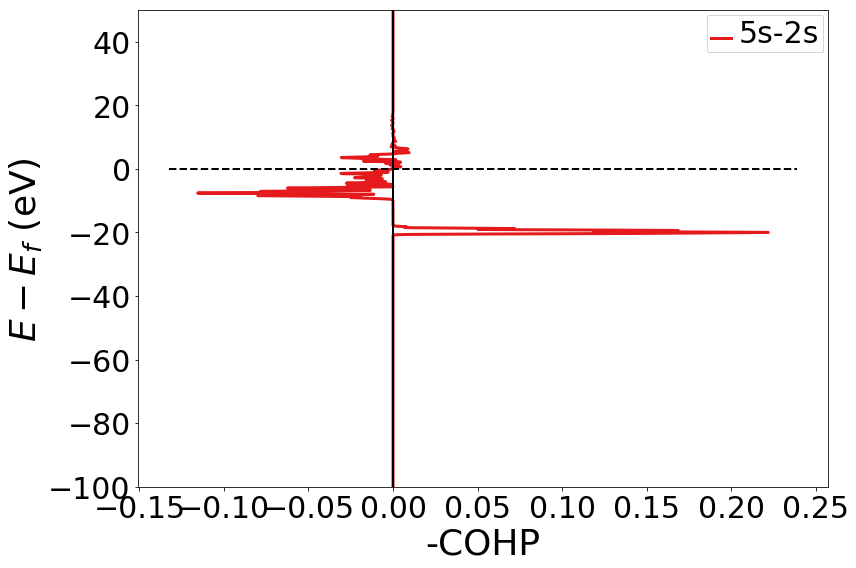

In [7]:
from pymatgen.electronic_structure.cohp import Cohp
from pymatgen.electronic_structure.plotter import CohpPlotter
from pymatgen.io.lobster import Cohpcar


#COHPCAR_path = "/home/inoue/vega/mizo_lobster/COHPCAR.lobster"
# COHPCAR_path = cohpcar_file
COHPCAR_path = "/home/mizokami-ubuntu/Vega/lobster/COHPCAR.lobster"
cohpcar = Cohpcar(filename=COHPCAR_path)
cdata = cohpcar.orb_res_cohp['1']
cdata_processed = {}
lst = ['5s-2s']
# for key in cdata:
for key in lst:
    c = cdata[key]
    c["efermi"] = 0
    c["energies"] = cohpcar.energies
    c["are_coops"] = False
    cdata_processed[key] = Cohp.from_dict(c)
cp = CohpPlotter()
cp.add_cohp_dict(cdata_processed)
x = cp.get_plot()
# x.ylim([-50, 20])
x.show()

In [116]:
cohpcar.energies

array([-100.03334,  -99.98333,  -99.93331, ...,   49.91664,   49.96666,
         50.01667])

In [209]:
from automater import results
import imp
imp.reload(results)
lobster = results.Lobster(working_dir=data_dir)

In [194]:
lobster.cohp_data['4s-4s'].as_dict()['COHP'].keys()

dict_keys(['1'])

In [317]:
cohp_data = lobster.cohp_data
keys = list(lobster.cohp_data.keys())
same_data = []
all_data = []
# for i in range(len(keys)):
#     all_data.append(np.array(cohp_data[keys[i]].as_dict()['COHP']['1']))
#     if not cohp_data[keys[i]].as_dict()['COHP']['1'] in same_data:
#         same_data.append(cohp_data[keys[i]].as_dict()['COHP']['1'])

for i in range(len(keys)):
    all_data.append(list(np.array(cohp_data[keys[i]].as_dict()['COHP']['1'])))
    if not list(np.round(cohp_data[keys[i]].as_dict()['COHP']['1'], 6)) in same_data:
        same_data.append(list(np.round(cohp_data[keys[i]].as_dict()['COHP']['1'], 6)))
    

duplicated = []
for data in same_data:
    idx = [ i for i, x in enumerate(all_data) if x == data ] 
    duplicated.append([ keys[ix] for ix in idx ])
print(duplicated)

print(len(all_data))
print(len(same_data))

[['total'], ['4s-4s'], ['4s-4py', '4s-4pz', '4s-4px'], ['4py-4s', '4pz-4s', '4px-4s'], ['4py-4py', '4pz-4pz', '4px-4px'], ['4py-4pz', '4py-4px', '4pz-4py', '4pz-4px', '4px-4py', '4px-4pz']]
17
6


In [314]:
keys

['total',
 '4s-4s',
 '4s-4py',
 '4s-4pz',
 '4s-4px',
 '4py-4s',
 '4py-4py',
 '4py-4pz',
 '4py-4px',
 '4pz-4s',
 '4pz-4py',
 '4pz-4pz',
 '4pz-4px',
 '4px-4s',
 '4px-4py',
 '4px-4pz',
 '4px-4px']

In [157]:
np.array(data['4py-4px']), 6) == np.round(np.array(data['4px-4py']))

TypeError: unsupported operand type(s) for *: 'Cohp' and 'float'

In [161]:
data['4px-4py'].as_dict()['COHP'] == data['4py-4px'].as_dict()['COHP']

True

In [162]:
lst = []
for i in lst:
    print(i)